In [18]:
#loading virtual python env
!source ./bin/activate


In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer # fixing miss val
import numpy as np
from sklearn.preprocessing import LabelEncoder # for dumy variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [6]:
url = "https://raw.githubusercontent.com/redashu/Datasets/master/data_preprocess1.csv"

In [7]:
data = pd.read_csv(url)

In [8]:
print(data)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  28.0  49000.0       Yes
11   France  42.0  75000.0        No
12    Spain  33.0  56000.0       Yes
13  Germany  45.0  77000.0        No
14   France  29.0  51000.0       Yes
15    Spain  51.0  85000.0        No
16  Germany  36.0      NaN        No
17   France  31.0  55000.0        No
18    Spain  39.0  63000.0       Yes
19  Germany  47.0  80000.0       Yes
20   France  26.0  47000.0        No
21    Spain  32.0  53000.0        No
22  Germany  41.0  71000.0       Yes
23   France  49.0  82000.0        No
24    Spain  34.0  57000.0       Yes
25  Germany  43.0  74000.0        No
2

In [9]:
df1=pd.read_csv("data_preprocess1.csv")

In [10]:
# checking basic metadata info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [11]:
#printing top 5 rows
df1.head(5)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [12]:
data.tail()


,Country,Age,Salary,Purchased
25,Germany,43.0,74000.0,No
26,France,52.0,88000.0,Yes
27,Spain,46.0,78000.0,No
28,Germany,25.0,45000.0,Yes
29,France,53.0,90000.0,No


In [13]:
#accessing partocular column
df1["Age"]


0     44.0
1     27.0
2     30.0
3     38.0
4     40.0
5     35.0
6      NaN
7     48.0
8     50.0
9     37.0
10    28.0
11    42.0
12    33.0
13    45.0
14    29.0
15    51.0
16    36.0
17    31.0
18    39.0
19    47.0
20    26.0
21    32.0
22    41.0
23    49.0
24    34.0
25    43.0
26    52.0
27    46.0
28    25.0
29    53.0
Name: Age, dtype: float64

In [14]:
df1[["Age","Salary"]]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [15]:
# using df iloc
df1.iloc[:,0:2]

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [16]:
# using df iloc
df1.iloc[1:,0:2]

,Country,Age
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0
10,Germany,28.0


In [17]:
# using df iloc
df1.iloc[:,0]

0      France
1       Spain
2     Germany
3       Spain
4     Germany
5      France
6       Spain
7      France
8     Germany
9      France
10    Germany
11     France
12      Spain
13    Germany
14     France
15      Spain
16    Germany
17     France
18      Spain
19    Germany
20     France
21      Spain
22    Germany
23     France
24      Spain
25    Germany
26     France
27      Spain
28    Germany
29     France
Name: Country, dtype: object

In [23]:
# separating data into input and output
input_features=df1.iloc[:,0:3].values
input_features


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['Germany', 28.0, 49000.0],
       ['France', 42.0, 75000.0],
       ['Spain', 33.0, 56000.0],
       ['Germany', 45.0, 77000.0],
       ['France', 29.0, 51000.0],
       ['Spain', 51.0, 85000.0],
       ['Germany', 36.0, nan],
       ['France', 31.0, 55000.0],
       ['Spain', 39.0, 63000.0],
       ['Germany', 47.0, 80000.0],
       ['France', 26.0, 47000.0],
       ['Spain', 32.0, 53000.0],
       ['Germany', 41.0, 71000.0],
       ['France', 49.0, 82000.0],
       ['Spain', 34.0, 57000.0],
       ['Germany', 43.0, 74000.0],
       ['France', 52.0, 88000.0],
       ['Spain', 46.0, 78000.0],
       ['Germany', 25.0, 45000.0],
       ['France', 53.0

In [26]:
label=df1.iloc[:,-1].values


In [27]:
label.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [28]:
# fixing age and salary miss val
ashu_impute=SimpleImputer(missing_values=np.nan,strategy="mean")


In [29]:
ashu_impute.fit(input_features[:,1:3]) # calculating the missing values 
input_features[:,1:3] = ashu_impute.transform(input_features[:,1:3]) # making changes

In [30]:
le=LabelEncoder()
label=le.fit_transform(label)

In [31]:
label

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

In [32]:
# data preprocessing using categorical values
ct=ColumnTransformer(transformers=[("encoder", OneHotEncoder(),[0])],remainder="passthrough")

In [33]:
input_features=np.array(ct.fit_transform(input_features))

In [34]:
input_features


array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 66071.42857142857],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 39.0, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 28.0, 49000.0],
       [1.0, 0.0, 0.0, 42.0, 75000.0],
       [0.0, 0.0, 1.0, 33.0, 56000.0],
       [0.0, 1.0, 0.0, 45.0, 77000.0],
       [1.0, 0.0, 0.0, 29.0, 51000.0],
       [0.0, 0.0, 1.0, 51.0, 85000.0],
       [0.0, 1.0, 0.0, 36.0, 66071.42857142857],
       [1.0, 0.0, 0.0, 31.0, 55000.0],
       [0.0, 0.0, 1.0, 39.0, 63000.0],
       [0.0, 1.0, 0.0, 47.0, 80000.0],
       [1.0, 0.0, 0.0, 26.0, 47000.0],
       [0.0, 0.0, 1.0, 32.0, 53000.0],
       [0.0, 1.0, 0.0, 41.0, 71000.0],
       [1.0, 0.0, 0.0, 49.0, 82000.0],
       [0.0, 0.0, 1.0, 34.0, 57000.0],
     

In [35]:
input_features.head()


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [36]:
# finally we have input and label this one we can train to Machine Learning ALgo
traing_input,testing_input,train_label,test_label=train_test_split(input_features,label,test_size=0.1)
# note test_size (0 to 1) --- 0.1 means 10% testing data size

In [38]:
traing_input


array([[1.0, 0.0, 0.0, 52.0, 88000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 39.0, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 66071.42857142857],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 28.0, 49000.0],
       [1.0, 0.0, 0.0, 49.0, 82000.0],
       [0.0, 1.0, 0.0, 43.0, 74000.0],
       [0.0, 0.0, 1.0, 34.0, 57000.0],
       [0.0, 0.0, 1.0, 33.0, 56000.0],
       [0.0, 1.0, 0.0, 45.0, 77000.0],
       [0.0, 1.0, 0.0, 41.0, 71000.0],
       [1.0, 0.0, 0.0, 29.0, 51000.0],
       [1.0, 0.0, 0.0, 42.0, 75000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 46.0, 78000.0],
       [0.0, 1.0, 0.0, 25.0, 45000.0],
       [0.0, 1.0, 0.0, 47.0, 80000.0],
       [0.0, 0.0, 1.0, 51.0, 85000.0],
       [0.0, 1.0, 0.0, 36.0, 66071.42857142857],
       [1.0, 0.0, 0.0, 31.0, 55000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 32.0, 53000.0],
       [0.0, 0.0, 1.0, 39.0, 63000.0],
     

In [39]:
traing_input


array([[1.0, 0.0, 0.0, 52.0, 88000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 39.0, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 66071.42857142857],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 28.0, 49000.0],
       [1.0, 0.0, 0.0, 49.0, 82000.0],
       [0.0, 1.0, 0.0, 43.0, 74000.0],
       [0.0, 0.0, 1.0, 34.0, 57000.0],
       [0.0, 0.0, 1.0, 33.0, 56000.0],
       [0.0, 1.0, 0.0, 45.0, 77000.0],
       [0.0, 1.0, 0.0, 41.0, 71000.0],
       [1.0, 0.0, 0.0, 29.0, 51000.0],
       [1.0, 0.0, 0.0, 42.0, 75000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 46.0, 78000.0],
       [0.0, 1.0, 0.0, 25.0, 45000.0],
       [0.0, 1.0, 0.0, 47.0, 80000.0],
       [0.0, 0.0, 1.0, 51.0, 85000.0],
       [0.0, 1.0, 0.0, 36.0, 66071.42857142857],
       [1.0, 0.0, 0.0, 31.0, 55000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 32.0, 53000.0],
       [0.0, 0.0, 1.0, 39.0, 63000.0],
     

In [40]:

#help(DecisionTreeClassifier)


In [41]:
# calling decision tree classifier
classifier=DecisionTreeClassifier()

In [43]:
#training classifier with preprocess data
trained_model=classifier.fit(traing_input,train_label)

In [44]:
predicted_values=trained_model.predict(testing_input)

In [45]:
print(predicted_values)

[0 1 0]


In [46]:
#actual
print(test_label)

[1 0 1]


In [48]:


#using acccuracy score
accuracy_score(test_label,predicted_values)

0.0

<function matplotlib.pyplot.show(close=None, block=None)>

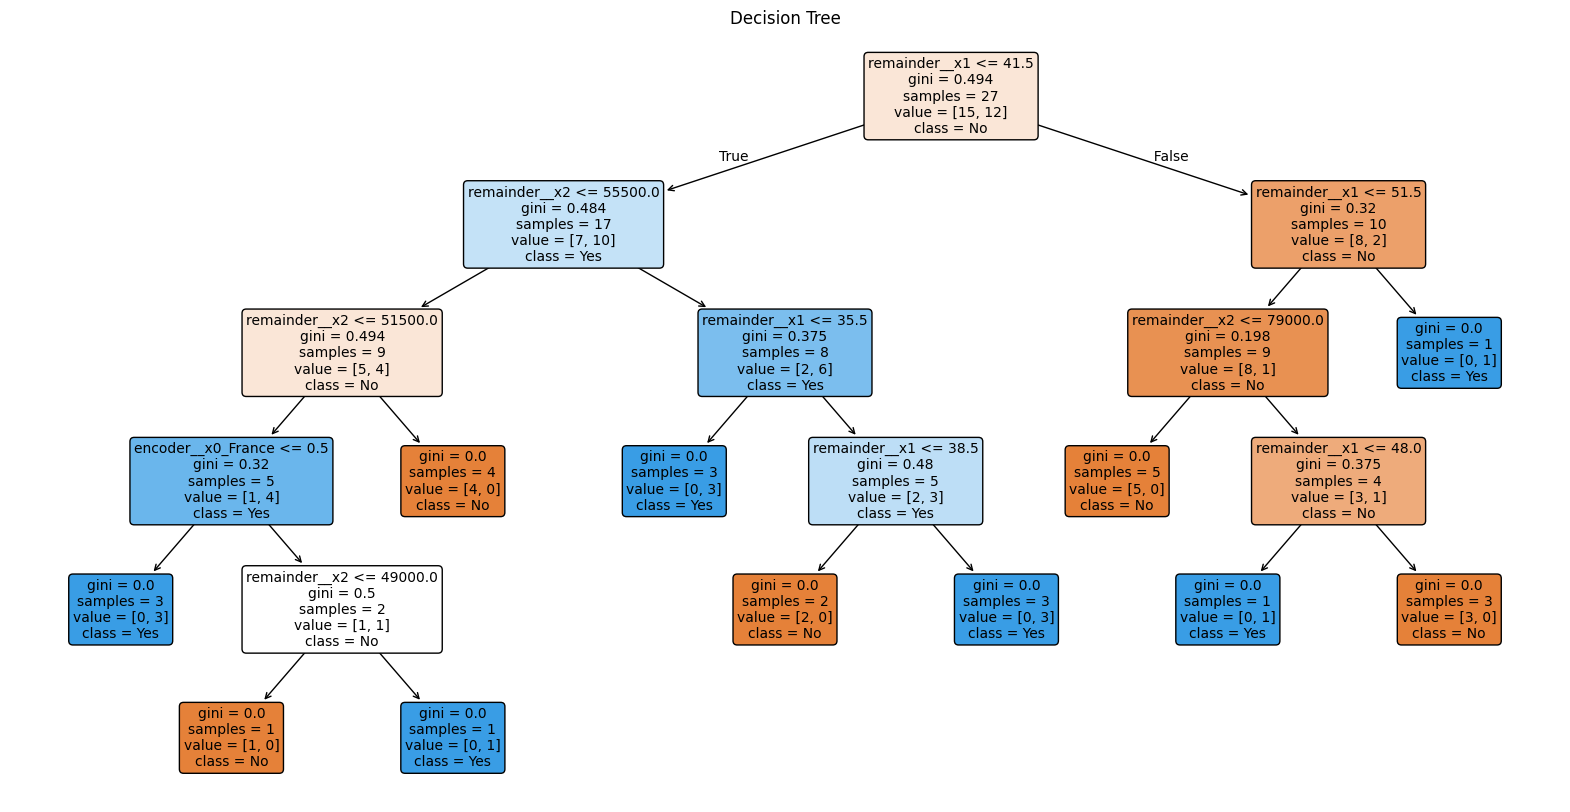

In [53]:
# We can use python to check decision tree graphx
plt.figure(figsize=(20,10))
plot_tree(classifier, feature_names=ct.get_feature_names_out(),
         class_names=le.classes_,
         filled=True,
         fontsize=10,
         rounded=True)
plt.title("Decision Tree")
plt.show

In [50]:
#features and label
le.classes_

array(['No', 'Yes'], dtype=object)

In [51]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)